### Импортирование библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib

import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import xgboost as xgb
from imblearn.over_sampling import SMOTE
from scipy.stats import mode, shapiro, probplot, ttest_ind, mannwhitneyu, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Описание датасета

* Home Ownership - домовладение
* Annual Income - годовой доход
* Years in current job - количество лет на текущем месте работы
* Tax Liens - налоговые обременения
* Number of Open Accounts - количество открытых счетов
* Years of Credit History - количество лет кредитной истории
* Maximum Open Credit - наибольший открытый кредит
* Number of Credit Problems - количество проблем с кредитом
* Months since last delinquent - количество месяцев с последней просрочки платежа
* Bankruptcies - банкротства
* Purpose - цель кредита
* Term - срок кредита
* Current Loan Amount - текущая сумма кредита
* Current Credit Balance - текущий кредитный баланс
* Monthly Debt - ежемесячный долг
* Credit Score - кредитный рейтинг
* Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

### Пути к директориям и файлам

In [2]:
DATASET_TEST_PATH = 'course_project_test.csv'
DATASET_TRAIN_PATH = 'course_project_train.csv'

### Извлечение данных

In [3]:
df_train = pd.read_csv(DATASET_TRAIN_PATH)
df_test = pd.read_csv(DATASET_TEST_PATH)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

В обоих датасетах имеются пропуски в данных и категориальные признаки

In [6]:
# Статистический анализ
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [7]:
# Статистический анализ
df_test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


### Анализ целевой переменной

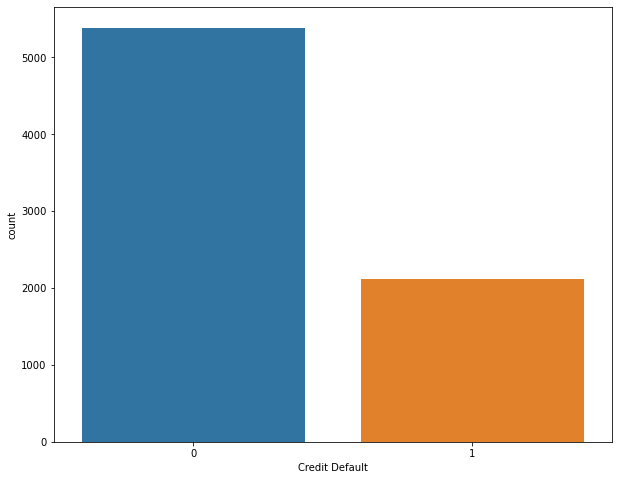

In [8]:
plt.figure(figsize=[10, 8])
sns.countplot(df_train['Credit Default'])
plt.show()

Наблюдается выраженный дисбаланс классов целевой переменной. Количество должников более чем в два раза меньше своевременных плательщиков. 

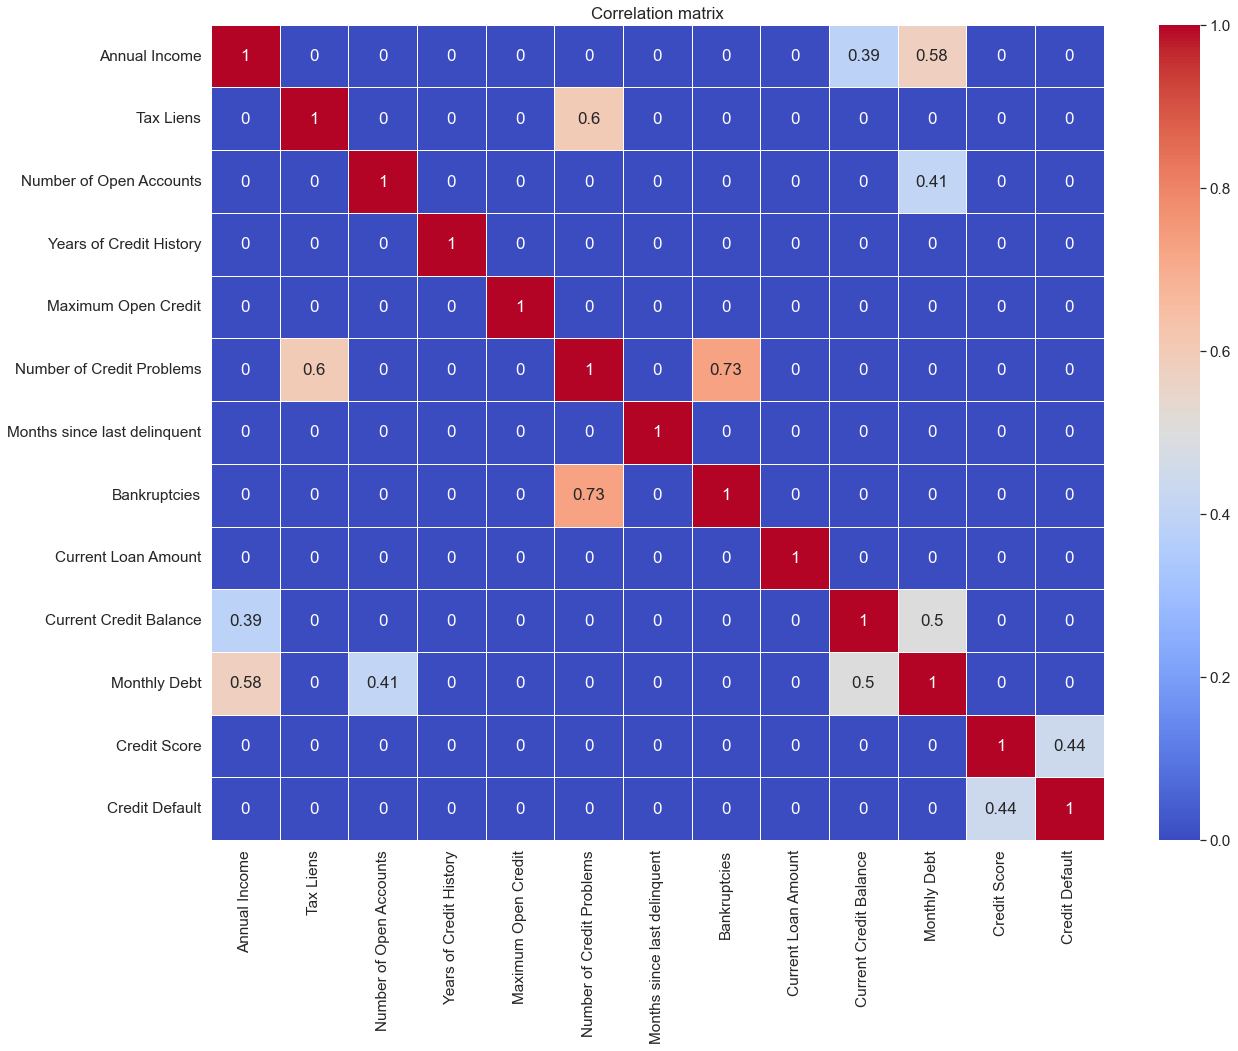

In [9]:
# Матрица корреляций
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Имеется два признака с ильной линейной зависимостью - бонкротства и количество проблемм по кредиту

### Создание класса предобработки данных

* В классе DataPreprocessing предусмотрено сохранение статистик по медианам и моде, рассчитанных на тренировочном датасете, с последующим применением их на тестовом датасете.
* Два объекта со значениями renewable energy в признаке Purpose удалены по причине отсутствия объектов с идентичными значениями в тестовом датасете. Это приводит к разной размерности датасетов после обработки категориальных признаков.
* StandardScaler обучен на тренировочном датасете. Для тестового набора данных применялся только метод transform

In [10]:
class DataPreprocessing:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.Number_of_Open_Accounts_median = None
        self.Years_of_Credit_History_median = None
        self.Number_of_Credit_Problems_median = None
        self.Current_Credit_Balance_median = None
        self.Months_since_last_delinquent_median = None
        self.Annual_Income_median = None
        self.Credit_Score_median = None
        self.Years_in_current_job_mode = None
        self.medians_outliers = None
        self.scaler = None
                
    def stat(self, df):
        """Сохранение статистик"""
        # Рассчет медиан
        self.Number_of_Open_Accounts_median = df['Number of Open Accounts'].median()
        self.Years_of_Credit_History_median = df['Years of Credit History'].median()
        self.Number_of_Credit_Problems_median = df['Number of Credit Problems'].median()
        self.Current_Credit_Balance_median = df['Current Credit Balance'].median()
        self.Months_since_last_delinquent_median = df['Months since last delinquent'].median()
        self.Annual_Income_median = df['Annual Income'].median()
        self.Credit_Score_median = df['Credit Score'].median()
        #Словарь медиан для выбросов
        self.medians_outliers = {'Number of Open Accounts': self.Number_of_Open_Accounts_median,
                                 'Years of Credit History': self.Years_of_Credit_History_median,
                                 'Number of Credit Problems': self.Number_of_Credit_Problems_median,
                                 'Current Credit Balance': self.Current_Credit_Balance_median
                                 }      

        # Рассчёт моды
        self.Years_in_current_job_mode = df['Years in current job'].mode()      
              
    """Подготовка данный для трейна"""    
    def transform_train(self, df):
        """Трансформация данных"""
        
        """Выбросы"""
        outliers_list = ['Number of Open Accounts',
                         'Years of Credit History',
                         'Number of Credit Problems',
                         'Current Credit Balance']
        for i in outliers_list:
            df.loc[(df[i] > df[i].quantile(q=0.95)) |
                         (df[i] < df[i].quantile(q=0.05)), i] = df[i].median()
        
        # Уберём два объекта с единственными значениями 'renewable energy'
        df.drop(list(df.loc[df['Purpose'] == 'renewable energy'].index), axis=0, inplace=True)
        
        """Обработка пропусков"""    
        # количество лет на текущем месте работы за моду
        df['Years in current job'][df['Years in current job'].isna()] = df['Years in current job'].mode()[0]
        
        # отсутствие значений примем за медиану
        df['Months since last delinquent'][df['Months since last delinquent'].isna()] = df['Months since last delinquent'].median()
       
        # банкротство за 0
        df['Bankruptcies'][df['Bankruptcies'].isna()] = 0
        
        #Заполнение пропусков медианой
        for i in df['Annual Income'][df['Annual Income'].isna()].index:
            df['Annual Income'][i] = df['Annual Income'].median()
        for i in df['Credit Score'][df['Credit Score'].isna()].index:
            df['Credit Score'][i] = df['Credit Score'].mean()
        
        """Категориальные признаки"""
        # Обработка категориальных признаков
        for cat_colname in df.select_dtypes(include='object').columns:
            df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)
            
        # Избавление от лишнишних признаков
        for drops in df.select_dtypes(include='object').columns:
            df.drop(drops, axis=1, inplace=True)
        
        """Выделение таргета"""
        X = df.drop('Credit Default', axis=1)
        y = df['Credit Default']
        
        """Избавление от дисбаланса целевого класса"""
        #resampling - в качестве метода устранения дисбаланса классов.
        sm = SMOTE(random_state=2)
        x_res, y_res = sm.fit_resample(X, y)
        
        """Разбиение датасета на тренировочную и валидационную выборки"""
        # Размер валидационно выборки 30%, перемешаем все объекты при разбиении
        X_train, X_valid, y_train, y_valid = train_test_split(x_res, y_res, test_size=0.3, random_state=2, shuffle=True)
        
        """Стандартизация признаков"""
        self.scaler = StandardScaler()
        self.scaler.fit(X_train)
        X_train_scaled = pd.DataFrame(self.scaler.transform(X_train))
        X_valid_scaled = pd.DataFrame(self.scaler.transform(X_valid))
        
        #Вернём название колонок 
        X_train_scaled.columns = list(x_res.columns)
        X_valid_scaled.columns = list(x_res.columns)
        X_train_scaled.rename(columns={'Years in current job_< 1 year': 'Years in current job lower 1 year'}, inplace=True)
        X_valid_scaled.rename(columns={'Years in current job_< 1 year': 'Years in current job lower 1 year'}, inplace=True)
        
        return X_train_scaled, X_valid_scaled, y_train, y_valid, y_res
        
    """Подготовка данных для теста"""
    def transform_test(self, df):
        """Трансформация данных"""
        
        
        """Выбросы"""
        outliers_list = ['Number of Open Accounts',
                         'Years of Credit History',
                         'Number of Credit Problems',
                         'Current Credit Balance']
        for i in outliers_list:
            df.loc[(df[i] > df[i].quantile(q=0.95)) |
                         (df[i] < df[i].quantile(q=0.05)), i] = self.medians_outliers[i]
            
        """Обработка пропусков"""    
        # количество лет на текущем месте работы за моду
        df['Years in current job'][df['Years in current job'].isna()] = self.Years_in_current_job_mode
        
        # отсутствие значений примем за медиану
        df['Months since last delinquent'][df['Months since last delinquent'].isna()] = self.Months_since_last_delinquent_median
       
        # банкротство за 0
        df['Bankruptcies'][df['Bankruptcies'].isna()] = 0
        
        #Заполнение пропусков медианой
        for i in df['Annual Income'][df['Annual Income'].isna()].index:
            df['Annual Income'][i] = self.Annual_Income_median
        for i in df['Credit Score'][df['Credit Score'].isna()].index:
            df['Credit Score'][i] = self.Credit_Score_median
        
        """Категориальные признаки"""
        # Обработка категориальных признаков
        for cat_colname in df.select_dtypes(include='object').columns:
            df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)
            
        # Избавление от лишнишних признаков
        for drops in df.select_dtypes(include='object').columns:
            df.drop(drops, axis=1, inplace=True)   
        
        # Создание списка названий колонок
        columns_list = list(df.columns)
        
        """Стандартизация признаков"""      
        X_test_scaled = pd.DataFrame(self.scaler.transform(df))
        
        #Вернём название колонок 
        X_test_scaled.columns = columns_list
        X_test_scaled.rename(columns={'Years in current job_< 1 year': 'Years in current job lower 1 year'}, inplace=True)
    
        return X_test_scaled

In [11]:
dp = DataPreprocessing()
dp.stat(df_train)
X_train_scaled, X_valid_scaled, y_train, y_valid, y_res = dp.transform_train(df_train)

In [12]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7541 entries, 0 to 7540
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Annual Income                      7541 non-null   float64
 1   Tax Liens                          7541 non-null   float64
 2   Number of Open Accounts            7541 non-null   float64
 3   Years of Credit History            7541 non-null   float64
 4   Maximum Open Credit                7541 non-null   float64
 5   Number of Credit Problems          7541 non-null   float64
 6   Months since last delinquent       7541 non-null   float64
 7   Bankruptcies                       7541 non-null   float64
 8   Current Loan Amount                7541 non-null   float64
 9   Current Credit Balance             7541 non-null   float64
 10  Monthly Debt                       7541 non-null   float64
 11  Credit Score                       7541 non-null   float

Посте обработки данных нет пропущенных значений, все признаки приведены к вещественным типам

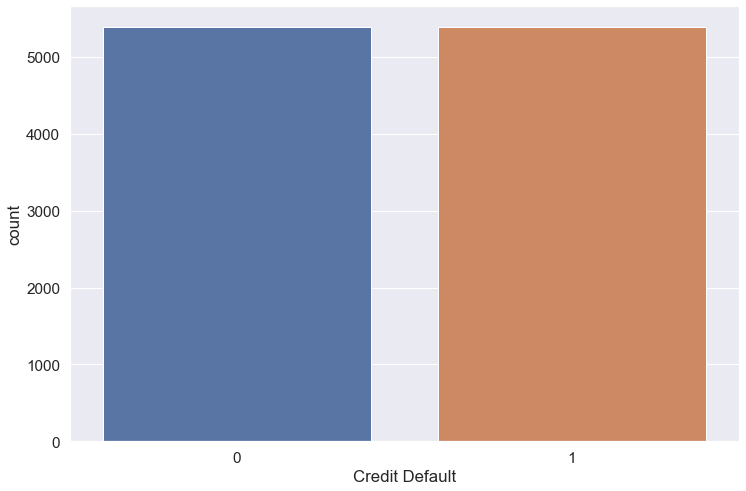

In [13]:
plt.figure(figsize=[12, 8])
sns.countplot(y_res)
plt.show()

Дисбаланс целевого класса устранён

### Построение модели

В качестве финальной модели классификатора выбран XGBClassifier. Подбор гиперпараметров осуществлялся исспользованием GridSearchCV, включая кросс-валидацию на 5 KFolds. Для усклрения выполнения кода данного ноутбука в модели уже учтены лучшие параметры после исспользования GridSearchCV.

In [15]:
# Метрики качества модели, матрица ошибок
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [16]:
%%time
gb_model = xgb.XGBClassifier(colsample_bytree=0.45, 
                             learning_rate=0.015, max_depth=6,
                             min_child_weight=0.1, 
                             n_estimators=1800,
                             reg_lambda=0.4,   
                             random_state =7)
gb_model.fit(X_train_scaled, y_train)

y_pred = gb_model.predict(X_valid_scaled)
y_pred_test = gb_model.predict(X_train_scaled)

get_classification_report(y_train, y_pred_test, y_valid, y_pred)

[17:50:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAIN

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3791
           1       1.00      0.94      0.97      3750

    accuracy                           0.97      7541
   macro avg       0.97      0.97      0.97      7541
weighted avg       0.97      0.97      0.97      7541

TEST

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1596
           1       0.89      0.75      0.81      1637

    accuracy                           0.83      3233
   macro avg       0.84      0.83      0.83      3233
weighted avg       0.84      0.83      0.83      3233

CONFUSION MATRIX

col_0              0     1
Credit Default            
0        

* Данной моделью были достигнуты необходимые значения метрики F1-score для целевого класса, со значением 0,81.
* Количество ошибок первого рода, составило 410 случая. Ошибок второго рода - 149 случаев. 

In [17]:
# степени важности признаков
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

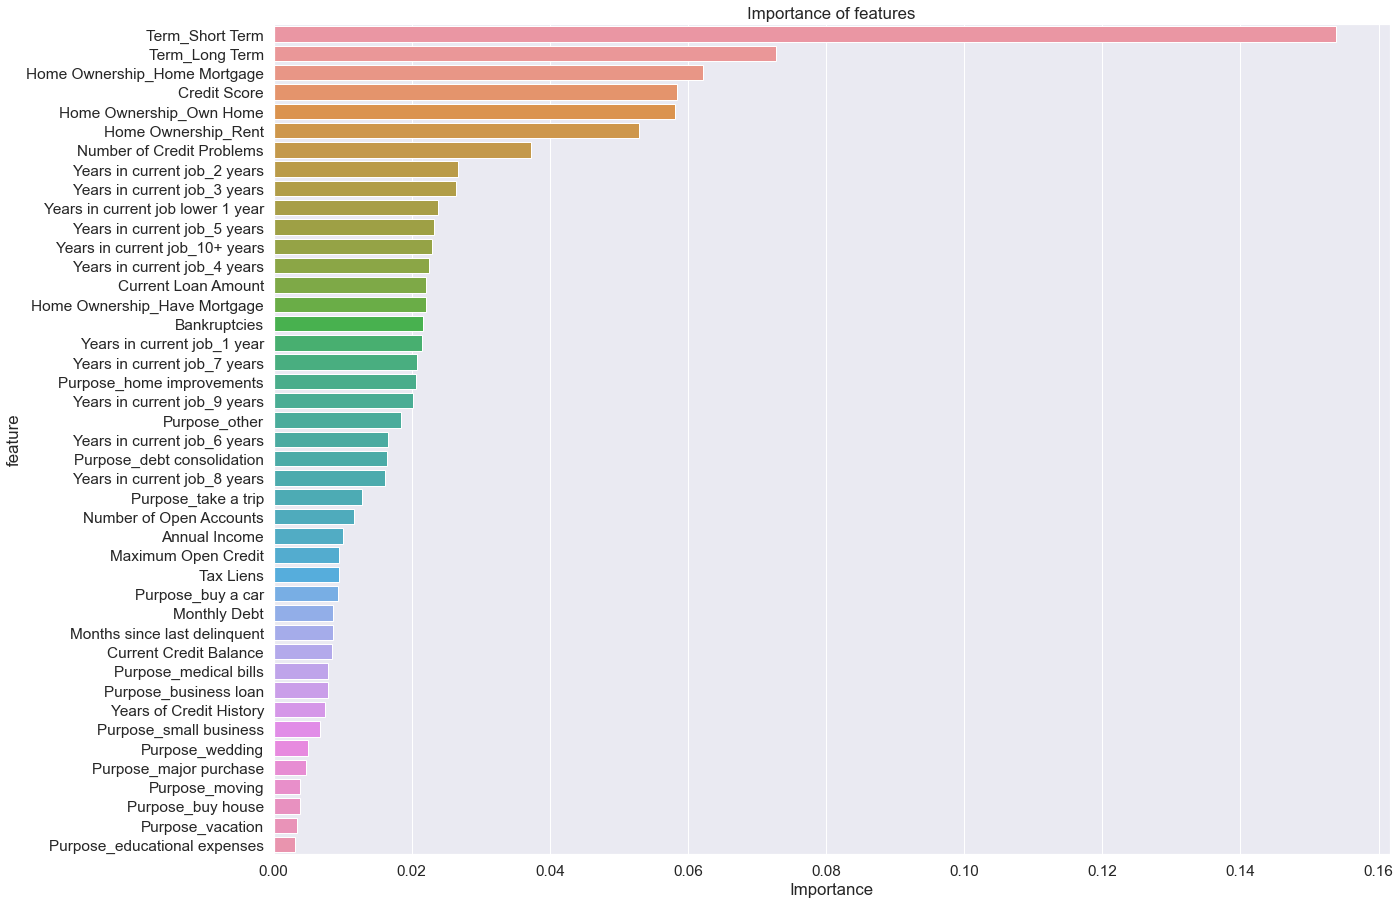

['Term_Short Term',
 'Term_Long Term',
 'Home Ownership_Home Mortgage',
 'Credit Score',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Number of Credit Problems',
 'Years in current job_2 years',
 'Years in current job_3 years',
 'Years in current job lower 1 year',
 'Years in current job_5 years',
 'Years in current job_10+ years',
 'Years in current job_4 years',
 'Current Loan Amount',
 'Home Ownership_Have Mortgage']

In [18]:
show_feature_importances(X_train_scaled.columns, gb_model.feature_importances_, get_top=15)

Наиболее важными признаками оказались показатели:
   * Срока кредита
   * Типов домовладения
   * Кредитного рейтинга
   * Количества проблем с кредитом

### Работа с тестовыми данными

In [19]:
# Тестовые данные до обработки
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [20]:
X_test_scaled = dp.transform_test(df_test)

In [21]:
# Тестовые данные после обработки
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Annual Income                      2500 non-null   float64
 1   Tax Liens                          2500 non-null   float64
 2   Number of Open Accounts            2500 non-null   float64
 3   Years of Credit History            2500 non-null   float64
 4   Maximum Open Credit                2500 non-null   float64
 5   Number of Credit Problems          2500 non-null   float64
 6   Months since last delinquent       2500 non-null   float64
 7   Bankruptcies                       2500 non-null   float64
 8   Current Loan Amount                2500 non-null   float64
 9   Current Credit Balance             2500 non-null   float64
 10  Monthly Debt                       2500 non-null   float64
 11  Credit Score                       2500 non-null   float

In [22]:
# Предсказание на  тестовых данных
y_pred = gb_model.predict(X_test_scaled)

In [23]:
# Сохранение предсказаний на тестовых данных
pd.DataFrame(y_pred).to_csv('NikiforenkoDS_predictions.csv', index=False)